# Visualizing the mouse behavior

In [2]:
import sys
sys.path.append('/Users/shayneufeld/GitHub/mouse_bandit/data_preprocessing_code')
sys.path.append('/Users/shayneufeld/GitHub/mouse_bandit')
import support_functions as sf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as sp
import bandit_preprocessing as bp
import sklearn.linear_model
from sklearn import discriminant_analysis
from sklearn import model_selection
from sklearn import tree as Tree
import sklearn.tree
import sys
import os
%matplotlib inline 

## load in csv files (from running exportTrials.m)

In [4]:
data90 = pd.read_csv('/Users/shayneufeld/GitHub/mouse_bandit/data/processed_data/master_9010_df.csv',index_col=0)
data80 = pd.read_csv('/Users/shayneufeld/GitHub/mouse_bandit/data/processed_data/new_master_8020_df.csv',index_col=0)
data70 = pd.read_csv('/Users/shayneufeld/GitHub/mouse_bandit/data/processed_data/master_7030_df.csv',index_col=0)

In [7]:
data90.head(2)

,Mouse ID,Session ID,Block Trial,Port Streak,Reward Streak,10_Port,10_Reward,10_ITI,10_trialDuration,9_Port,...,2_trialDuration,1_Port,1_Reward,1_ITI,1_trialDuration,0_ITI,Decision,Switch,Higher p port,Reward
0,dumble,4_.csv,11.0,1.0,1.0,0.0,1.0,0.000,0.891,0.0,...,0.582,0.0,1.0,10.666,0.688,1.650,1.0,1.0,0.0,0.0
1,dumble,4_.csv,12.0,1.0,-1.0,0.0,1.0,1.523,0.540,0.0,...,0.688,1.0,0.0,1.650,0.428,1.421,0.0,1.0,1.0,1.0


In [8]:
data80.head(2)

,Mouse ID,Session ID,Block Trial,Port Streak,Reward Streak,10_Port,10_Reward,10_ITI,10_trialDuration,9_Port,...,2_trialDuration,1_Port,1_Reward,1_ITI,1_trialDuration,0_ITI,Decision,Switch,Higher p port,Reward
0,dumble,70716,11.0,10.0,-1.0,1.0,1.0,1.801,0.439,1.0,...,0.325,1.0,0.0,2.133,0.482,1.411,1.0,0.0,1.0,0.0
1,dumble,70716,12.0,10.0,-2.0,1.0,1.0,1.828,0.353,1.0,...,0.482,1.0,0.0,1.411,0.435,2.169,0.0,1.0,0.0,0.0


In [9]:
data70.head(2)

,Mouse ID,Session ID,Block Trial,Port Streak,Reward Streak,10_Port,10_Reward,10_ITI,10_trialDuration,9_Port,...,2_trialDuration,1_Port,1_Reward,1_ITI,1_trialDuration,0_ITI,Decision,Switch,Higher p port,Reward
0,dumble,41_ .c,11.0,8.0,-1.0,0.0,0.0,1.845,1.073,1.0,...,0.418,0.0,0.0,2.208,0.419,1.658,0.0,0.0,1.0,1.0
1,dumble,41_ .c,12.0,9.0,1.0,1.0,0.0,2.980,1.432,0.0,...,0.419,0.0,1.0,1.658,0.762,3.032,0.0,0.0,1.0,1.0


In [75]:
sns.set_style('white')

//anaconda/envs/CaGRIN/lib/python3.5/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/envs/CaGRIN/lib/python3.5/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/envs/CaGRIN/lib/python3.5/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/envs/CaGRIN/lib/python3.5/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/envs/CaGRIN/lib/python3.5/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


total # of blocks in dataset: ~152
total # of blocks in dataset: ~156


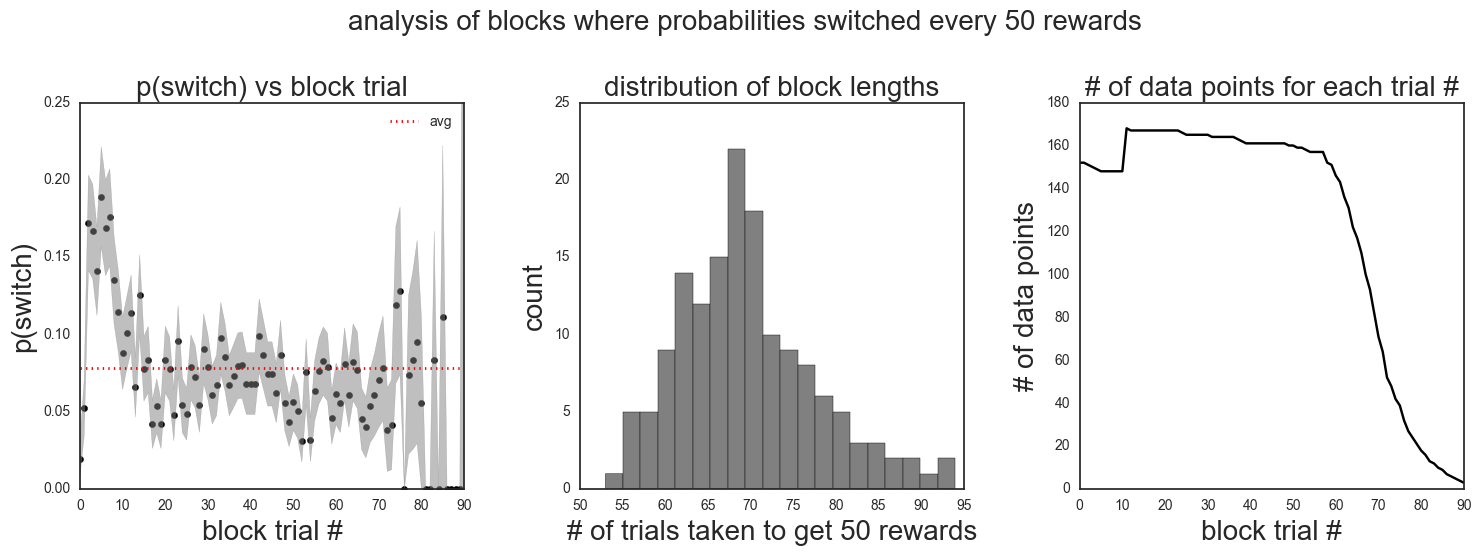

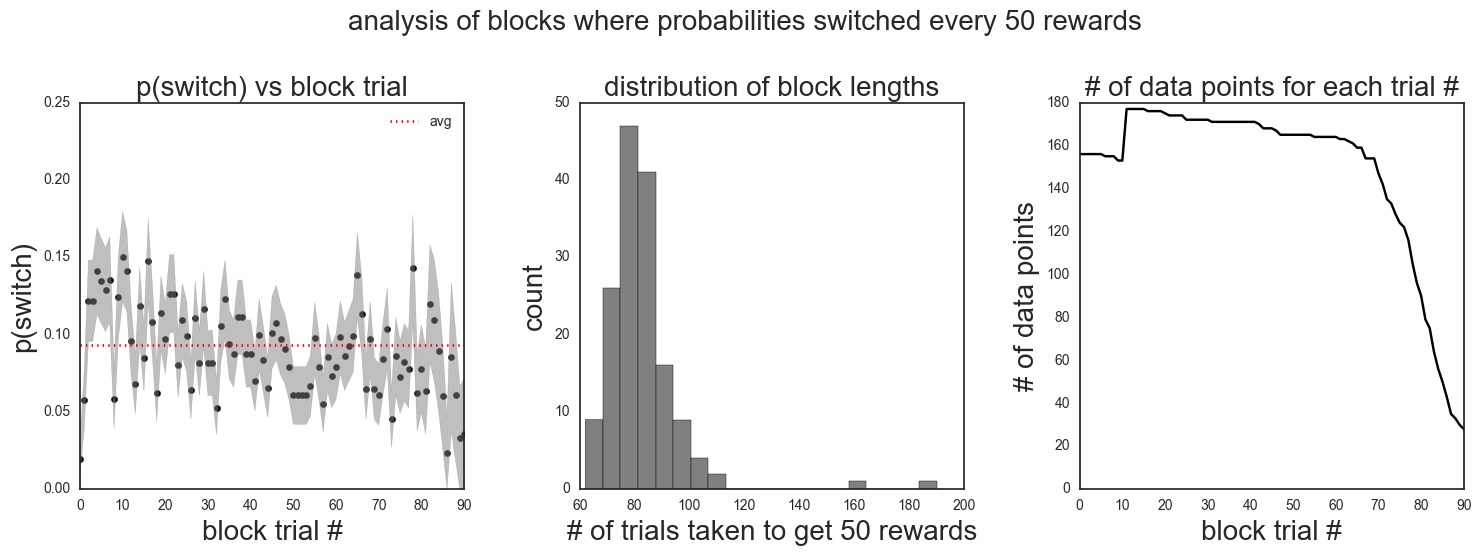

In [84]:
'''
90-10
'''
datas = [data80,data70]

for data in datas:
    t_block_unique = np.unique(data['Block Trial'].values)
    p_switch_block = np.zeros((t_block_unique.shape[0],2))
    high_p_port = np.zeros_like(p_switch_block)
    trial_block_count = np.zeros_like(t_block_unique)

    for t in t_block_unique:
        p_switch_block[t,0] = data[data['Block Trial'] == t]['Switch'].mean(axis=0)
        trial_block_count[t] = data[data['Block Trial'] == t].shape[0]
        p_switch_block[t,1] = data[data['Block Trial'] == t]['Switch'].std(axis=0) / np.sqrt(trial_block_count[t])

        high_p_port[t,0] = data[data['Block Trial']==t]['Higher p port'].mean(axis=0)
        high_p_port[t,1] = data[data['Block Trial']==t]['Higher p port'].std(axis=0) / np.sqrt(trial_block_count[t])


    x_end=90
    plt.figure(figsize=(15,5))
    plt.suptitle('analysis of blocks where probabilities switched every 50 rewards',x=0.5,y=1.1,fontsize=20)

    plt.subplot(131)
    plt.scatter(t_block_unique,p_switch_block[:,0],color='black')
    plt.fill_between(t_block_unique,p_switch_block[:,0]+p_switch_block[:,1],p_switch_block[:,0]-p_switch_block[:,1],color='grey',alpha=0.5)
    plt.hlines(data['Switch'].mean(axis=0),xmin=0,xmax=x_end,color='red',linestyle='dotted',label='avg',linewidth=2)
    plt.legend(loc='upper right')
    plt.xlim(0,x_end)
    plt.ylim(0,0.25)
    plt.xlabel('block trial #',fontsize=20)
    plt.ylabel('p(switch)',fontsize=20)
    plt.title('p(switch) vs block trial',fontsize=20)

    plt.subplot(132)
    plt.hist(data.iloc[np.where(data['Block Trial']==0)[0]-1]['Block Trial'],bins=20,color='grey')
    plt.title('distribution of block lengths',fontsize=20)
    plt.xlabel('# of trials taken to get 50 rewards',fontsize=20)
    plt.ylabel('count',fontsize=20)

    plt.subplot(133)
    plt.plot(t_block_unique,trial_block_count,color='black')
    plt.title('# of data points for each trial #',fontsize=20)
    plt.ylabel('# of data points',fontsize=20)
    plt.xlabel('block trial #',fontsize=20)
    plt.xlim(0,x_end)

    plt.tight_layout()
    print('total # of blocks in dataset: ~%.0f' % (np.sum(data['Block Trial']==0)))

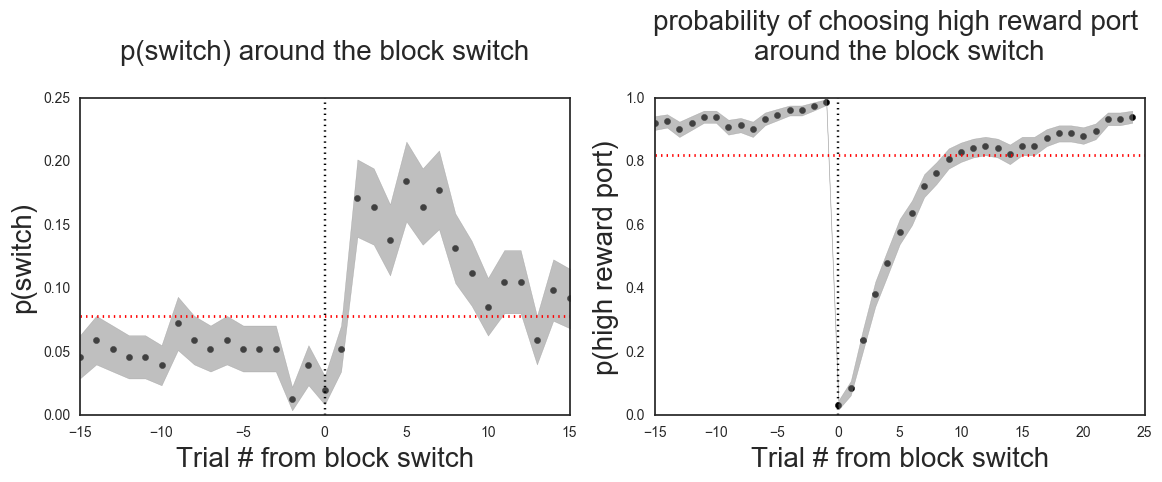

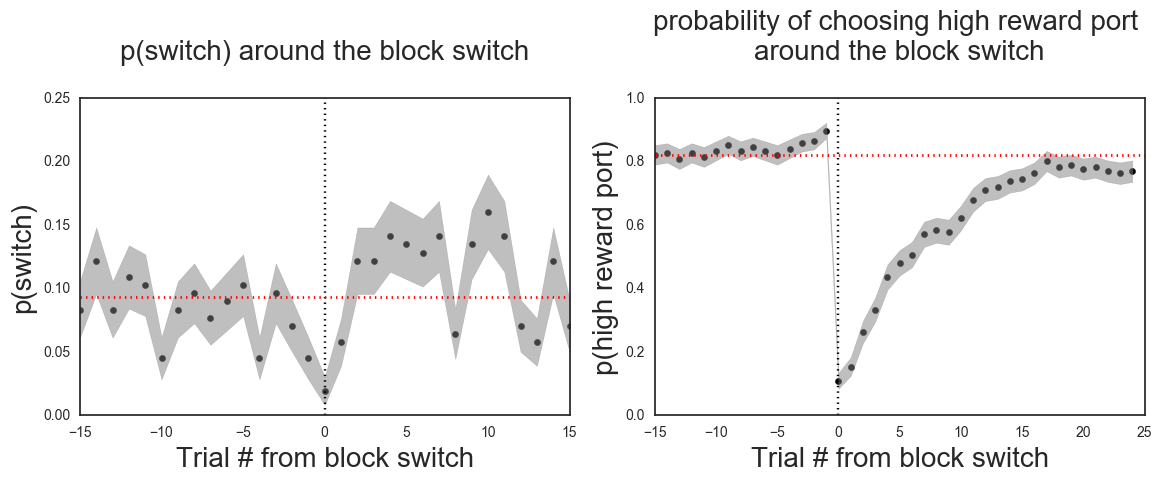

In [86]:
for data in datas:

    data.index = np.arange(data.shape[0])

    switch_points = data[data['Block Trial'] == 0 ].index.values

    L = 15
    paraswitch = np.zeros((switch_points.shape[0],L*2 + 10))
    paraswitch_port = np.zeros_like(paraswitch)

    for i,point in enumerate(switch_points):
        paraswitch[i,:] = data.iloc[point-L:point+L+10]['Switch']
        paraswitch_port[i,:] = data.iloc[point-L:point+L+10]['Higher p port'] 

    u = paraswitch.mean(axis=0)
    s = paraswitch.std(axis=0)
    SE = s/np.sqrt(paraswitch.shape[0])
    plt.figure(figsize=(12,5))

    plt.subplot(121)
    plt.scatter(np.arange(-1*L,L+10),u,color='black')
    plt.fill_between(np.arange(-1*L,L+10),u+SE,u-SE,color='grey',alpha=0.5)
    plt.vlines(x=0,ymin=0,ymax=0.5,color='black',linestyle='dotted')
    plt.hlines(data['Switch'].mean(axis=0),xmin=-1*L,xmax=L+1,color='red',linestyle='dotted',label='avg',linewidth=2)
    plt.xlabel('Trial # from block switch',fontsize=20)
    plt.ylabel('p(switch)',fontsize=20)
    plt.title('p(switch) around the block switch',fontsize=20,x=0.5,y=1.1)
    plt.xlim(-1*L,L)
    plt.ylim(0,0.25)

    plt.subplot(122)
    u = paraswitch_port.mean(axis=0)
    s = paraswitch_port.std(axis=0)
    SE = s/np.sqrt(paraswitch.shape[0])
    plt.scatter(np.arange(-1*L,L+10),u,color='black')
    plt.fill_between(np.arange(-1*L,L+10),u+SE,u-SE,color='grey',alpha=0.5)
    plt.vlines(x=0,ymin=0,ymax=1,color='black',linestyle='dotted')
    plt.hlines(0.82,xmin=-1*L,xmax=L+10,color='red',linestyle='dotted',label='avg',linewidth=2)
    plt.xlabel('Trial # from block switch',fontsize=20)
    plt.ylabel('p(high reward port)',fontsize=20)
    plt.title('probability of choosing high reward port \naround the block switch',fontsize=20,x=0.5,y=1.1)
    plt.xlim(-1*L,L+10)
    plt.ylim(0,1)

    plt.tight_layout()

(0, 1)

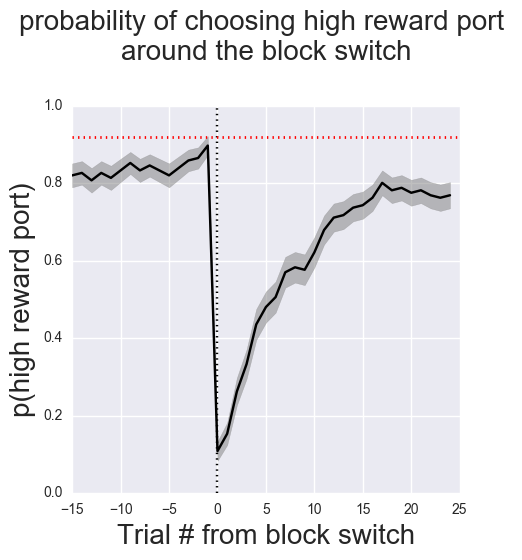

In [74]:
u = paraswitch_port.mean(axis=0)
s = paraswitch_port.std(axis=0)
SE = s/np.sqrt(paraswitch.shape[0])
plt.figure(figsize=(5,5))
plt.plot(np.arange(-1*L,L+10),u,color='black')
plt.fill_between(np.arange(-1*L,L+10),u+SE,u-SE,color='grey',alpha=0.5)
plt.vlines(x=0,ymin=0,ymax=1,color='black',linestyle='dotted')
plt.hlines(0.92,xmin=-1*L,xmax=L+10,color='red',linestyle='dotted',label='avg',linewidth=2)
plt.xlabel('Trial # from block switch',fontsize=20)
plt.ylabel('p(high reward port)',fontsize=20)
plt.title('probability of choosing high reward port \naround the block switch',fontsize=20,x=0.5,y=1.1)
plt.xlim(-1*L,L+10)
plt.ylim(0,1)

In [34]:
switch_points = data[data['Block Trial'] == 0 ].index.values
switch_points

array([   52,   129,   218,   290,   362,   430,   509,   600,   667,
         731,   803,   875,   946,  1015,  1098,  1209,  1276,  1344,
        1406,  1476,  1554,  1642,  1718,  1845,  1907,  1969,  2023,
        2090,  2167,  2232,  2308,  2397,  2477,  2546,  2627,  2695,
        2774,  2842,  2907,  2991,  3050,  3134,  3192,  3268,  3330,
        3400,  3470,  3532,  3606,  3686,  3750,  3824,  3901,  3988,
        4070,  4148,  4235,  4317,  4391,  4456,  4520,  4581,  4647,
        4767,  4827,  4919,  4991,  5056,  5128,  5199,  5316,  5389,
        5462,  5534,  5605,  5674,  5734,  5803,  5924,  5994,  6076,
        6152,  6223,  6304,  6367,  6424,  6493,  6564,  6632,  6696,
        6766,  6828,  6898,  6954,  7024,  7098,  7164,  7224,  7293,
        7359,  7482,  7549,  7618,  7704,  7776,  7855,  7924,  8051,
        8131,  8200,  8266,  8338,  8413,  8490,  8559,  8667,  8741,
        8807,  8900,  8967,  9062,  9122,  9213,  9280,  9344,  9405,
        9475,  9551,

little note on the for loop below. 

took me little while because I had the order of the else-if statements wrong. 

when block_trial == 0 needs to come BEFORE whether the block trial incremented by 1 or not (which is my hokey way of detecting when a new session started where block_trial does not equal 0. 

I suppose a better way would be to detect when the block trial is 11 AND the previous block trial != 10. that would work. okay. switched it to that now. 

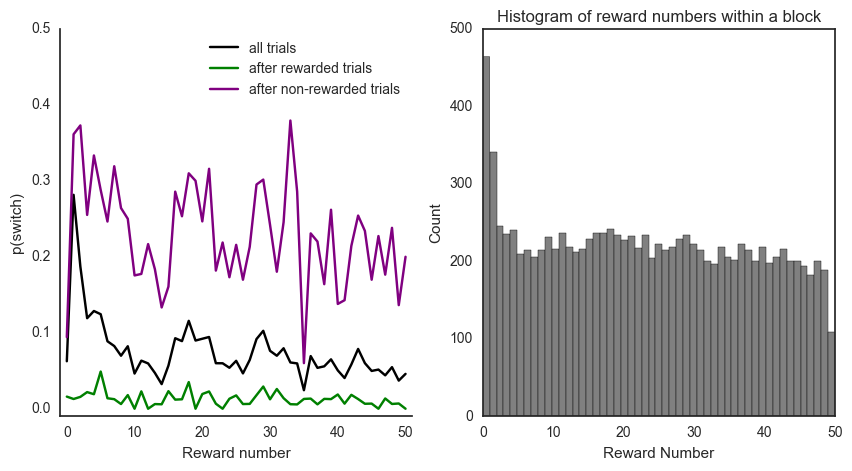

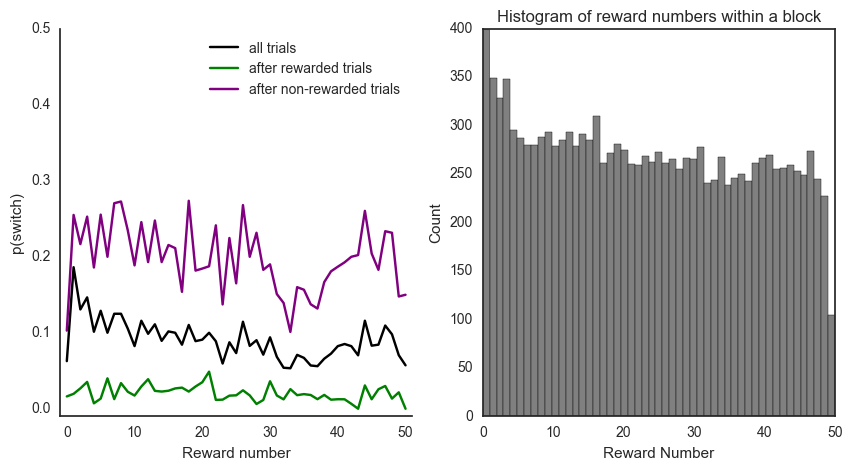

In [89]:
for data in datas:

    block_reward = np.zeros(data.shape[0])
    for i in range(data.shape[0]):
        trial = data.iloc[i]

        #lets deal with weird cases first:
        #1) the first row
        if(i == 0):
            block_reward[i] = trial[['10_Reward','9_Reward','8_Reward','7_Reward','6_Reward',
                                    '5_Reward','4_Reward','3_Reward','2_Reward','1_Reward','Reward']].sum()

        #3) the first trial of a new block
        elif (trial['Block Trial'] == 0):
            block_reward[i] = 0

        #2) the first trial of a new session
        elif (((trial['Block Trial'] - trial_prev['Block Trial']) != 1) and (trial['Block Trial'] == 11)):
            block_reward[i] = trial[['10_Reward','9_Reward','8_Reward','7_Reward','6_Reward',
                                    '5_Reward','4_Reward','3_Reward','2_Reward','1_Reward','Reward']].sum()
        else:
            block_reward[i] = block_reward[i-1] + trial['Reward']

        trial_prev = trial

    reward_switches = np.zeros(np.unique(block_reward).shape[0])
    reward_switches_afterR = np.zeros(np.unique(block_reward).shape[0])
    reward_switches_afterNoR = np.zeros(np.unique(block_reward).shape[0])
    for i,r_block in enumerate(np.unique(block_reward)):
        reward_switches[i] = data[block_reward == r_block]['Switch'].mean()
        reward_switches_afterR[i] = data[((block_reward == r_block) & (data['1_Reward']==1))]['Switch'].mean()
        reward_switches_afterNoR[i] = data[((block_reward == r_block) & (data['1_Reward']==0))]['Switch'].mean()

    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.plot(np.unique(block_reward),reward_switches,color='black',label='all trials')
    plt.plot(np.unique(block_reward),reward_switches_afterR,color='green',label='after rewarded trials')
    plt.plot(np.unique(block_reward),reward_switches_afterNoR,color='purple',label='after non-rewarded trials')
    plt.xlabel('Reward number')
    plt.ylabel('p(switch)')
    plt.legend(loc='upper right')
    plt.xlim(-1,51)
    plt.ylim(-0.01,0.5)
    sns.despine()

    plt.subplot(122)
    plt.hist(block_reward,bins=51,color='grey')
    plt.title('Histogram of reward numbers within a block')
    plt.xlabel('Reward Number')
    plt.ylabel('Count')